# BERT STS Task

In [2]:
import pandas as pd
train_data = pd.read_csv("train.csv",sep="\t")
val_data = pd.read_csv("dev.csv",sep="\t")

In [3]:
train_data.dropna(inplace=True)
val_data.dropna(inplace = True)

In [4]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, random_split

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prepare data (Assuming 'data' is defined)
input_sentences = [(row[1]["sentence1"], row[1]["sentence2"]) for row in train_data.iterrows()]
similarity_scores = list(train_data["score"])  # Example similarity scores

# Tokenize input sentences
train_tokenized_inputs = tokenizer(input_sentences, padding=True, truncation=True, return_tensors='pt').to(device)

# Convert similarity scores to torch tensors
train_labels = torch.tensor(similarity_scores, dtype=torch.float32).unsqueeze(1).to(device)  # Unsqueeze to match logits shape

# Create a TensorDataset
train_dataset = TensorDataset(train_tokenized_inputs.input_ids, train_tokenized_inputs.token_type_ids, train_tokenized_inputs.attention_mask, train_labels)


# Prepare data (Assuming 'data' is defined)
input_sentences = [(row[1]["setence1"], row[1]["sentence2"]) for row in val_data.iterrows()]
similarity_scores = list(val_data["score"])  # Example similarity scores

# Tokenize input sentences
val_tokenized_inputs = tokenizer(input_sentences, padding=True, truncation=True, return_tensors='pt').to(device)

# Convert similarity scores to torch tensors
val_labels = torch.tensor(similarity_scores, dtype=torch.float32).unsqueeze(1).to(device)  # Unsqueeze to match logits shape

# Create a TensorDataset
val_dataset = TensorDataset(val_tokenized_inputs.input_ids, val_tokenized_inputs.token_type_ids, val_tokenized_inputs.attention_mask, val_labels)

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=5, shuffle=False)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-6)

train_loss_epochs = []
val_loss_epochs = []

# Training loop
model.train()
for epoch in range(5):
    print("Training")
    print("Epoch Number:", epoch)
    batch_number = 1
    # Training phase
    train_loss = 0.0
    for batch in train_loader:
        print("Batch Number:", batch_number)
        input_ids, token_type_ids, attention_mask, targets = batch
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)
        logits = outputs.logits.squeeze()
        targets = targets.squeeze()
        # Use mean square error (MSE) loss
        loss = torch.nn.functional.mse_loss(logits, targets)
        loss.backward()
        optimizer.step()
        print("Loss:",loss.item())
        train_loss += loss.item()
        batch_number += 1
    # Calculate average training loss for the epoch
    average_train_loss = train_loss / len(train_loader)
    train_loss_epochs.append(average_train_loss)
    # Validation phase
    val_loss = 0.0
    print("Validation")
    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            input_ids, token_type_ids, attention_mask, targets = batch
            outputs = model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)
            logits = outputs.logits.squeeze()
            targets = targets.squeeze()
            # Calculate validation loss using MSE
            loss = torch.nn.functional.mse_loss(logits, targets)
            print("Validation Loss:",loss.item())
            val_loss += loss.item()
    # Calculate average validation loss for the epoch
    average_val_loss = val_loss / len(val_loader)
    val_loss_epochs.append(average_val_loss)
    # Print average training and validation loss for the epoch
    print("Average Training Loss:", average_train_loss)
    print("Average Validation Loss:", average_val_loss)

    model.train()  # Set model back to training mode


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_w

Streaming output truncated to the last 5000 lines.
Batch Number: 83
Loss: 0.36278581619262695
Batch Number: 84
Loss: 0.11571723222732544
Batch Number: 85
Loss: 0.283891499042511
Batch Number: 86
Loss: 0.31518012285232544
Batch Number: 87
Loss: 0.0801553800702095
Batch Number: 88
Loss: 0.2165229320526123
Batch Number: 89
Loss: 0.30846890807151794
Batch Number: 90
Loss: 0.09962596744298935
Batch Number: 91
Loss: 0.13391879200935364
Batch Number: 92
Loss: 0.9060458540916443
Batch Number: 93
Loss: 0.17851027846336365
Batch Number: 94
Loss: 0.3550623059272766
Batch Number: 95
Loss: 0.1896144300699234
Batch Number: 96
Loss: 1.1033766269683838
Batch Number: 97
Loss: 0.5774842500686646
Batch Number: 98
Loss: 0.6740557551383972
Batch Number: 99
Loss: 0.17639802396297455
Batch Number: 100
Loss: 0.008908665738999844
Batch Number: 101
Loss: 0.8876914978027344
Batch Number: 102
Loss: 0.7762570381164551
Batch Number: 103
Loss: 0.056075066328048706
Batch Number: 104
Loss: 0.22601734101772308
Batch Nu

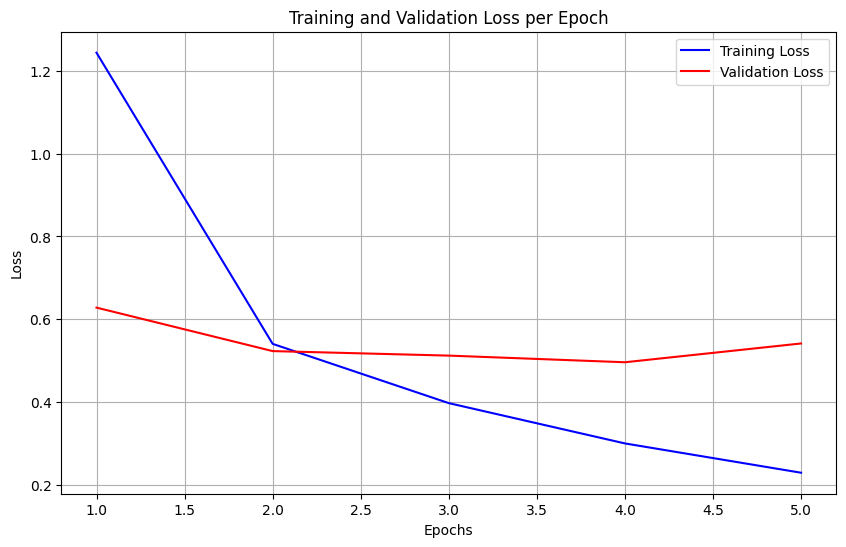

In [6]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
epochs = range(1, 6)
train_loss = train_loss_epochs
val_loss = val_loss_epochs

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from scipy.stats import pearsonr
model.eval()
predicted_scores = []
true_scores = []
with torch.no_grad():
    for batch in val_loader:
        input_ids, token_type_ids, attention_mask, targets = batch
        outputs = model(input_ids=input_ids.to(device), token_type_ids=token_type_ids.to(device), attention_mask=attention_mask.to(device))
        logits = outputs.logits.squeeze().cpu().numpy()  # Flatten the logits and move to CPU
        targets = targets.squeeze().cpu().numpy()  # Flatten the targets and move to CPU
        predicted_scores.extend(logits)
        true_scores.extend(targets)

# Compute Pearson correlation coefficient
pearson_corr, _ = pearsonr(predicted_scores, true_scores)
print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: 0.8822675584768873


In [8]:
torch.save(model.state_dict(), 'BERT_STS_1A.pth')